In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

In [2]:
folder="random/"

In [3]:
total_loss=pd.read_csv(folder+"total_loss.dat",sep='\s+',header=None,usecols=[3])
total_loss=total_loss.rename(columns={3: "erp"});

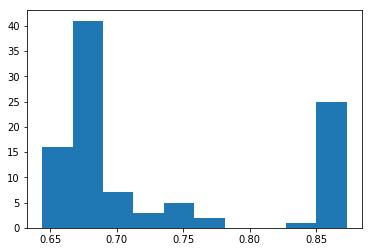

In [4]:
plt.hist(total_loss['erp'],bins=10)
plt.show()

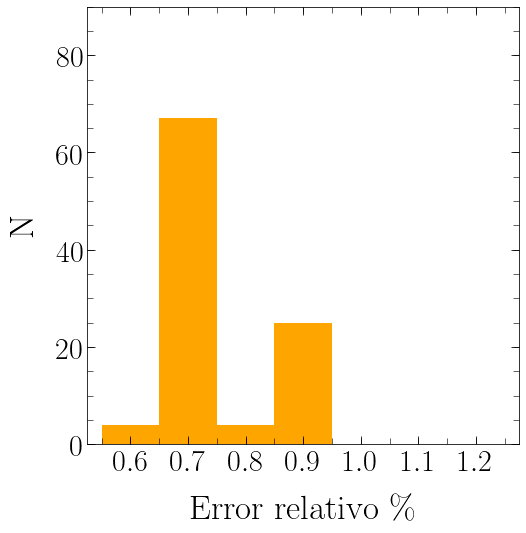

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans')

nbins=9
jmin=0.45
jmax=1.35
Nmin=0
Nmax=90
fig=plt.figure(figsize=(8,8))
ax=plt.subplot(111)
bins=np.linspace(jmin,jmax,nbins+1)
plt.hist(total_loss['erp'],bins=bins,color='orange')
ax.tick_params(direction='in',which='major',labelsize=30,length=8,bottom=True,top=True,left=True,right=True);
ax.tick_params(direction='in',which='minor',length=6,bottom=True,top=True,left=True,right=True);
plt.xlabel("Error relativo \%",fontsize=35,labelpad=15)
plt.ylabel("N",fontsize=35,labelpad=15)
plt.xlim(jmin+0.075,jmax-0.075)
plt.ylim(Nmin,Nmax)
ax.yaxis.set_major_locator(mticker.MultipleLocator(20));
ax.yaxis.set_minor_locator(mticker.MultipleLocator(5));
ax.xaxis.set_major_locator(mticker.MultipleLocator(0.1));
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.05));
plt.subplots_adjust(left=0.15,right=0.9,bottom=0.14,top=0.9)   # <--
#plt.tight_layout()
plt.savefig("Jmin_random.eps",transparent=True)
plt.show()

In [6]:
min(total_loss['erp'])

0.6439

In [7]:
filt2=[]
for i in total_loss['erp']:
    if(i<0.649):
        filt2.append(i)
filt2.sort()
nfilt2=len(filt2)
print(max(filt2))
print(min(filt2))
print(nfilt2)

0.6486
0.6439
4


# Parámetros $\alpha$ y $r_{rcut}$

In [8]:
evenlist=[]
oddlist=[]
for i in range(200): 
    if (i % 2 == 0): 
        evenlist.append(i) 
    else: 
        oddlist.append(i) 

In [9]:
alpha=pd.read_csv(folder+"params.dat",sep='\s+',header=None,skiprows=oddlist,usecols=[0,2,4,6])
rcut=pd.read_csv(folder+"params.dat",sep='\s+',header=None,skiprows=evenlist,usecols=[0,2,4,6])

In [10]:
alpha=alpha.rename(columns={2: "l=0"});
alpha=alpha.rename(columns={4: "l=1"});
alpha=alpha.rename(columns={6: "l=2"});
rcut=rcut.rename(columns={2: "l=0"});
rcut=rcut.rename(columns={4: "l=1"});
rcut=rcut.rename(columns={6: "l=2"});

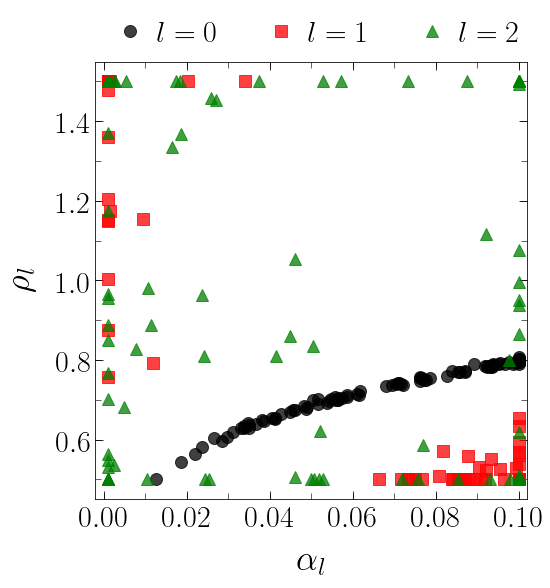

In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans')

rmin=0.45
rmax=1.55
amin=-0.002
amax=0.102
fig=plt.figure(figsize=(8,8))
ax=plt.subplot(111)
plt.plot(alpha["l=0"],rcut["l=0"],'ko',markersize=12,alpha=0.75,label='$l=0$')
plt.plot(alpha["l=1"],rcut["l=1"],'rs',markersize=12,alpha=0.75,label='$l=1$')
plt.plot(alpha["l=2"],rcut["l=2"],'g^',markersize=12,alpha=0.75,label='$l=2$')
ax.tick_params(direction='in',which='major',labelsize=30,length=8,bottom=True,top=True,left=True,right=True);
ax.tick_params(direction='in',which='minor',length=6,bottom=True,top=True,left=True,right=True);
ax.legend(loc='upper left',bbox_to_anchor=(0.01, 1.16, 0, 0),fontsize=30,ncol=3,handlelength=0.2,frameon=False)
plt.xlabel(r"$\alpha_l$",fontsize=35,labelpad=15)
plt.ylabel(r"$\rho_l$",fontsize=35,labelpad=15)
plt.xlim(amin,amax)
plt.ylim(rmin,rmax)
ax.yaxis.set_major_locator(mticker.MultipleLocator(0.2));
ax.yaxis.set_minor_locator(mticker.MultipleLocator(0.1));
ax.xaxis.set_major_locator(mticker.MultipleLocator(0.02));
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.01));
plt.subplots_adjust(left=0.15,right=0.9,bottom=0.14,top=0.9)   # <--
#plt.tight_layout()
plt.savefig("minspace_random.eps",transparent=True)
plt.show()

In [13]:
initer=12
maxevals=48
totevals=initer+maxevals

In [14]:
filename="Be6CFGSTO_"+str(initer)+"GP"+str(maxevals)+".dat"
df=pd.read_csv(folder+"seed_1/"+filename,sep='\t')
df2=pd.DataFrame(columns=df.columns)
for i in range(100):
    fseed="seed_"+str(i+1)+"/"
    df=pd.read_csv(folder+fseed+filename,sep='\t')
    df2=df2.append(df.iloc[df['Y'].idxmin(), :], ignore_index=True)

In [15]:
imin=0
imax=totevals+5

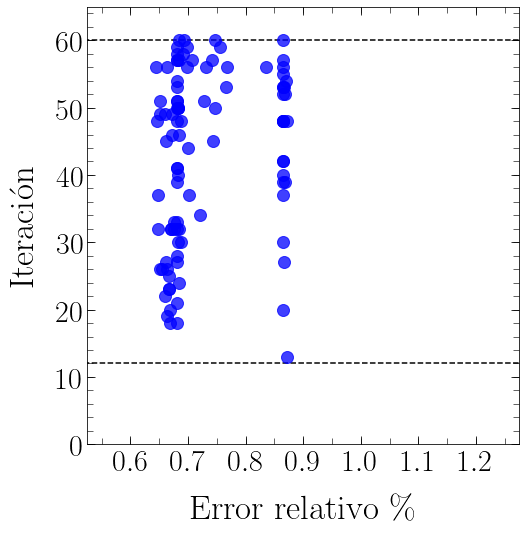

In [17]:
fig=plt.figure(figsize=(8,8))
ax=plt.subplot(111)
plt.plot(df2['Y'],df2['Iteration'],'bo',markersize=12,alpha=0.75)
ax.tick_params(direction='in',which='major',labelsize=30,length=8,bottom=True,top=True,left=True,right=True);
ax.tick_params(direction='in',which='minor',length=6,bottom=True,top=True,left=True,right=True);
plt.xlabel("Error relativo \%",fontsize=35,labelpad=15)
plt.ylabel("Iteración",fontsize=35,labelpad=15)
plt.xlim(jmin+0.075,jmax-0.075)
plt.ylim(imin,imax)
plt.hlines(initer,jmin,jmax,colors='k',linestyles='dashed')
plt.hlines(totevals,jmin,jmax,colors='k',linestyles='dashed')
ax.yaxis.set_major_locator(mticker.MultipleLocator(10));
ax.yaxis.set_minor_locator(mticker.MultipleLocator(2));
ax.xaxis.set_major_locator(mticker.MultipleLocator(0.1));
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.05));
plt.subplots_adjust(left=0.15,right=0.9,bottom=0.14,top=0.9)   # <--
#plt.tight_layout()
plt.savefig("imin_random.eps",transparent=True)
plt.show()